In [41]:
# import packages and helper modules
from math import sqrt, log

import multiprocessing as mp
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sts
import seaborn as sns

from data import data
from workers import simulate_and_count_adjacent, simulate_and_measure

In [42]:
# graphics parameters
from IPython.display import set_matplotlib_formats
%matplotlib inline
set_matplotlib_formats('svg')

## Section One - The What

In certain ways, I never really stopped being a kid. So, as December drew closer, I found myself eagerly waiting to tear open the first door of my advent calendar. Perhaps a standard chocolate advent calendar wouldn't be too out of place at my age, but the Lego Star Wars themed variant that I had in my possession (with ages 6–14 stamped on the front) was perhaps a more unusual choice. Despite this, I was happy; two of my favourite things—Star Wars and Lego—combined together was always going to be a recipe for success. After closer inspection though, this happiness quickly changed to suspicion.

After ripping off the plastic packing and folding back the cardboard covering, I was greeted by the standard 4 by 6 grid of numbers you would expect to find on any normal advent calendar. Except something wasn't quite right.

### Against All Odds

Although [many of the original advent calendars](http://www.my-adventcalendar.com/origin--history-2.html) had their doors arranged in a regular order, most advent calendars you can buy today have a (seemingly—as we shall soon see) random layout. The belief in this randomness has proliferated through society, with [Wikipedia saying](https://en.wikipedia.org/wiki/Advent_calendar) that the "doors are distributed across the calendar in no particular order"—and when have they ever been wrong?

As a mathematician, I am always on the look out for patterns; and as a statistician, I often find myself thinking about the odds of a particular event occurring. Combining these two tendencies together, I noticed that there was a distinct *lack* of pattern in the layout of these numbers, so much so that it seemed against all odds that such a distribution would have come out by random chance. In particular, I noticed that not a single pair of consecutive numbers (e.g. 4 and 5, 20 and 21) were directly adjacent to each other on the grid.

To anyone that hasn't given the notion of randomness much deep thought (I accept that I'm the outlier here and that this accounts for most people) there may seem nothing wrong with this. After all, if these layouts are truly random, why would we expect to obtain any patterns such as the adjacent consecutive numbers I so desired? 

This argument seems convincing but is actually flawed. The problem is that humans (even statisticians at times) are quite bad at judging what randomness really looks like. It is not hard to find numerous case studies demonstrating this: 

* Apple making the iTunes shuffle function [less random, so it feel more random](https://www.daxthink.com/think/2017/2/27/apple-made-itunes-shuffle-less-random-to-make-it-more-random)

* Humans struggling to [generate 'random' sequences of coin tosses](https://www.youtube.com/watch?v=H2lJLXS3AYM&feature=emb_title)

* Seven appearing [14% more often than by random chance](https://www.reddit.com/r/dataisbeautiful/comments/acow6y/asking_over_8500_students_to_pick_a_random_number/) when people are asked to pick a random number between one and ten.

There is an entire field of psychological research dedicated to this phenomenon but the sticky-note-summary is that we are simply not very good at judging what randomness should look like.

With this in mind (and unsure of my own ability to judge randomness), I decided to perform a back-of-the-envelope calculation to determine roughly how likely it was to have no adjacent consecutive numbers in a completely random layout. The exact details of this calculation I will save for the next section but the headline figure is that this event would only occur 3.3% of the time if the layouts were truely random. 

Colour me dubious. 

### Just to Check

That was only a rough calculation though. I had made some assumptions that may or may not have held in the real world. By this point though, the statistics bug had bit me and I wasn't going to stop until I had an answer. 

Calculating the exact odds of a random layout having no adjacent consecutive doors is actually quite a difficult task. I decided a better approach would be use sheer computational power to simulate several million random layouts and see how many of them had no adjacent consecutive doors. Unsurprisingly, generating such a large number of layouts took some time but the incredible amount of heat my laptop pumped out as it whirred away performing these computations, keeping me warm on a vastly under-heated London Northwestern train, was much appreciated. The result of these simulations is as follows.

In [43]:
# create multiprocessing pool
p = mp.Pool(mp.cpu_count())

In [44]:
if __name__ ==  '__main__': 
    adjacency_counts = p.map(simulate_and_count_adjacent, range(10**7))

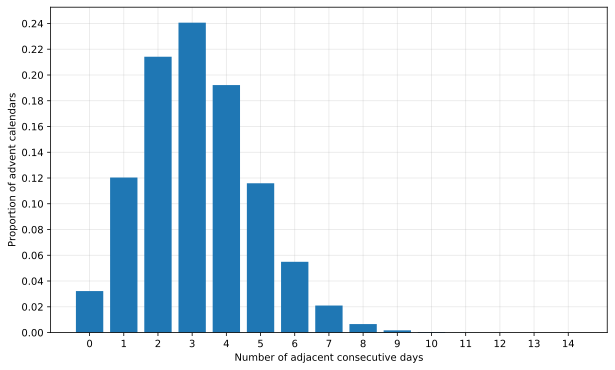

In [45]:
fig, ax = plt.subplots(figsize=(10, 6), facecolor='w')
ax.hist(adjacency_counts, 
        bins = np.arange(-0.5, max(adjacency_counts)+1.5),
        density=True,
        rwidth=0.8)
ax.set_xlabel('Number of adjacent consecutive days')
ax.set_xticks(np.arange(0, max(adjacency_counts) + 1))
ax.set_ylabel('Proportion of advent calendars')
ax.set_yticks(np.arange(0, 0.26, 0.02))
ax.grid('k--', alpha=0.3)
ax.set_axisbelow(True)

The rough estimate wasn't so bad after all! With the same (or at least similar) odds of 3.3%, the chance of having so few adjacent consecutive doors is certainly low enough to cast doubt. 

Yet, coincidences do happen. How can we be confident that I didn't just have an unusually distributed layout. To move towards a concrete answer, we'll need some data...

### Branching Out

Before I launched myself down the rabbit hole, I thought it would be a good idea to check whether someone had looked into this topic before. Perhaps I could save myself some time. A quick Google of "Are advent calendars actually random?", however, returned no results of relevance. There are clearly two possibilities.

1) I am showcasing a level of statistical-obsession towards advent calendars that the world is yet to have witnessed

2) Google is in on the Big Advent conspiracy and is censoring other people's research on the topic; fearful that the truth might get out

Using [Occam's Razor](https://science.howstuffworks.com/innovation/scientific-experiments/occams-razor.htm) it is safe to conclude that the latter must the true reason.

Big Advent is a powerful entity though, and one lone example will not bring it down. I therefore decided that the next step in this journey would be to go out and collect data. That is, I needed the layout of other advent calendars. The idea being that the more suspiciously laid-out calendars I could find, the more confident I would become that the disparity wasn't down to chance.

Anyone that is close to me will certainly be aware of this search for data. For the last few weeks it has been close to impossible to have a conversation with me without me asking about the ownership and details of one's advent calendar. The security team at my local Tesco may also be aware, as my multiple trips into the store solely to take pictures of advent calendars and then leave without a purchase may have caught their attention—I only hope I've not been added to any lists.

The fruit of my labour makes it worth the while; 25 unique layouts of advent calendars, hopefully representative of the general population.

Instead of using the counts of adjacent consecutive doors as before, I wanted to consider a more all-encompassing metric for this final push. I decided that the best thing to look at would be the total sum of the distances between each consecutive pair of numbers across the calendar. I arbitrarily defined the distance between two adjacent doors to be 1 and so, for example, the distance between the bottom left and bottom right door of a vertical calender would be 5 and the distance of the diagonally opposite doors would be $\sqrt{3^2 + 5 ^2} = \sqrt{34}$ using our trusted [Pythagorean theorem](https://www.mathplanet.com/education/pre-algebra/right-triangles-and-algebra/the-pythagorean-theorem) from high school. 

With this in mind, I simulated another several million random layouts to find what distribution this metric _should_ have _if_ the layouts were actually random. I then plotted the likelihood curve for this distribution with the values for my observed, real-world calendars added as red lines.

In [46]:
if __name__ ==  '__main__': 
    distances = p.map(simulate_and_measure, range(10**7))

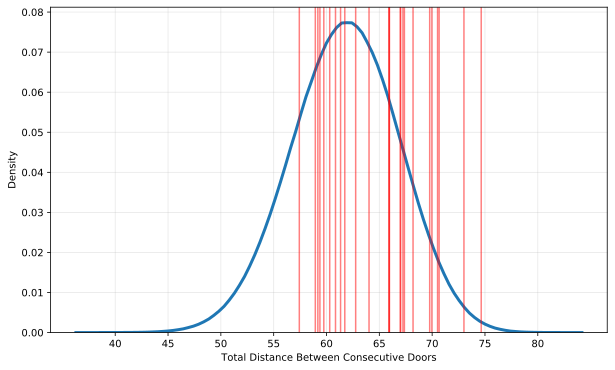

In [47]:
fig, ax = plt.subplots(figsize=(10, 6), facecolor='w')
sns.distplot(distances, hist = False, kde = True,
             kde_kws = {'linewidth': 3})
ax.set_xlabel('Total Distance Between Consecutive Doors')
ax.set_xticks(np.arange(40, 85, 5))
ax.set_ylabel('Density')
ax.grid('k--', alpha=0.3)
ax.set_axisbelow(True)

observations = []
for d in data:
    layout = [divmod(e, 6) for r in d for e in r]
    tot = 0
    for p1, p2 in zip(layout[:-1], layout[1:]):
        tot += sqrt((p1[0]-p2[0]) ** 2 + (p1[1]-p2[1]) ** 2)
    observations.append(tot)
    ax.axvline(tot, c = 'red', alpha = 0.5)

It is not hard to see that the real-life advent calendars tend to have a higher total distance between consecutive doors than expected. In other words, it seems that the real advent calendars have their numbers much more spaced out than would be likely if they were actually random.

Can we quantify this discrepancy? Suppose that the real-life advent calendars did in fact have randomly distributed doors. What would the probability be that we saw a result as significant as this? The statistical details of finding this probability are a bit messy but when we work through the maths, we come out with the following number.

In [48]:
# hypothesis testing using Fisher's method
p_vals = [sum([o < d for d in distances]) / len(distances) 
          for o in observations]
x_sqrd = -2 * sum([log(p) for p in p_vals])
p_val = 1 - sts.chi2.cdf(x_sqrd, 2 * len(observations))
print(f"p-value using Fisher's Method: {round(p_val, 6)}")

p-value using Fisher's Method: 0.001059


Put in simple English, the chance that we would have obtained the distribution of total distances that we saw in our real-life examples _if_ they were in fact random is around 0.11%. In other words, the chance of that occurring is around 1 in 1000—tossing 10 heads in a row with a fair coin is about as likely. That's certainly enough evidence for me to throw away the belief that these calendars' layouts could indeed by random.

I'm not sure what to do with this information now. I think I'm in shock. I've been lied to about the true nature of advent calendars for my entire life and it's going to take me a while to get over that. I'm sure WikiLeaks would be interested in this result although I'm afraid of what the consequences of revealing this information might be—Big Advent likely have their fingers in many pies after all. Perhaps it's best if we just keep this as our little secret?

Or, well, I wouldn't exactly mind if you were to share this post with a few trusted others...

<hr>

## Section Two - The How

With the bulk of this post out of the way, let's start tying together any loose ends, though without going too heavy into the mathematical details.

### Rough Working

First, how did I come up with that initial estimate that a random layout would have no adjacent consecutive doors only 3.3% of the time? In order to make this calculation simple to compute by hand (with the support of a calculator, of course), I had to make the assumption that the events that any two consecutive doors are adjacent are independent of one another. Essentially (though not exactly—see below), I assumed that one consecutive pair being adjacent or not had no influence on whether the others were. Funnily enough, I've struggled to show (though I didn't give it much thought) that they _aren't_ independent. Despite this, my instinct says that they shouldn't be and it's best to play it safe so this is indeed an assumption. If anyone can offer a simple example showing that these events are not independent, feel free to share it in this post's comments.

The beauty of this assumption is that if we know that probability that any two consecutive doors are adjacent (we'll call this $p_\textrm{adj}$), our independence assumption gives us the probability that there are no consecutive adjacent doors to be $\left(1-p_\textrm{adj}\right)^{23}$. This is due to the [product rule for independent events](https://www.thoughtco.com/multiplication-rule-for-independent-events-3126602) combined with the fact that there are 23 such pairs.

Finding $p_\textrm{adj}$ is not too hard either. We do this by breaking the doors of the advent calendar up into 3 types depending on how many neighbours they have.

We then consider a pair of doors chosen uniformly at random from all possible choices. We ask which type of door the first is. It is not hard to see that there is $\frac{8}{24} = \frac{1}{3}$ chance of having a door with four neighbours, $\frac{12}{24} = \frac{1}{2}$ for three neighbours, and $\frac{4}{24} = \frac{1}{6}$ for a lonely two neighbours. In each of these cases the chance that the other door is adjacent to the first is $\frac{4}{23}$, $\frac{3}{23}$ and $\frac{2}{23}$, respectively. This covers all possible cases and so we have,

$$p_\textrm{adj} = \frac{1}{3}\cdot\frac{4}{23} + \frac{1}{2}\cdot\frac{3}{23} + \frac{1}{6}\cdot\frac{2}{23} = \frac{19}{138} \approx 0.1377$$

Substituting this into the expression we had above, the probability (under the assumption of independence) that we have no adjacent consecutive doors is

$$\left(1 - \frac{19}{138}\right)^{23} \approx 0.0331$$

as we had before.

### There is Only One Test!

I love the statistics of this problem because it reminds of a cherished blog post that I came across around a year ago titled, "[There is Only One Test!](http://allendowney.blogspot.com/2011/05/there-is-only-one-test.html)".

The post is definitely worth a read (the same could be said for Allen's entire blog) but I will briefly summarise. Statistics is often taught in an unhelpful way, treating the process of hypothesis testing as a game of hide-and-seek in which we aim to find an appropriate test from our arsenal of normals, t's, chi-squareds and F's, and blindly apply it with little thought to the underlying reasons for doing this. 

In the end, we're always trying to answer the same question: "Suppose we are in a system where our apparent effect was purely due to chance (the null hypothesis); what is the probability that the effect we saw occurs. If this probability is very small, then we should probably reevaluate whether the null hypothesis is correct". Focusing too heavily on which test is best is often unhelpful. A better way to think is to focus on what the distribution of our test statistic is under the null hypothesis. If that distribution so happens to be of the various forms we mentioned above, then great, we have a _shortcut_ to compute the answer. The problem would still be tractable if the distribution didn't have such a nice form, we'd just be forced to use a more complicated method such as simulation, approximation, bootstrapping, or Monte Carlo methods to find the probability of interest. That's the key idea—there is nothing special about the common statistical tests that we learn in an introductory statistics class. They are just computational tools to make our lives easier; no matter which we use, the underlying test is the same.

This is exactly the train of thought I employed to tackle this problem. I had a test statistic of interest, namely the total distance between consecutive doors, and I wanted to know the likelihood that we would have seen the observed real-world values of this statistic given that the layouts were truly random. 

Did I know what distribution this statistic followed? Well, kind of. The [Central Limit Theorem](https://www.investopedia.com/terms/c/central_limit_theorem.asp) suggests that it should be reasonably normal (as it is the sum of 23 identically distributed distances), but requires an assumption of independence. Even though the individual distances of pairs are only weakly correlated, they are definitely _not_ independent and so I didn't want to rely too heavily on this approach.

Instead, I decided to simply simulate this statistic a few million times. This gave me a strong idea of what the true distribution of the statistic under the null hypothesis should look like. Yes, it did turn out to be reasonably normally distributed (though perhaps with a longer negative tail than would be desired) but the maximum likelihood estimators of the mean and standard deviation were far from what I would have expected using the central limit theorem so it looks like this was a good call.

With this simulated distribution, it is then trivial to calculate p-values for any particular observation; we simply count how many of the simulated statistics lie above the observed value and divide this by the total number of simulations. This is exactly what a p-value is: the proportion of observations that lie above (in this case at least) a certain value when we assume the null hypothesis.

### Something's Fishy

As discussed above, simulation gives us a great way to calculate p-values for our observations without having to resort to approximations, fallacious assumptions, or attempting to forcibly transform our statistic to match a common distribution.

These p-values alone are not enough to come to a conclusion though. If we look at the data for the Lego Star Wars advent calendar shown above, it turns out that the total distance between consecutive doors only comes to $61.3$. That's actually less than the mean of the simulated distribution. Yes, there may be no adjacent consecutive doors, but overall, there isn't anything too special about the total distance between the pairs, leading us to a pathetic p-value of $0.54$. This is a long way from the $<0.05$ we typically set as a threshold for rejecting the null hypothesis.

Don't fear though, we have 24 other observations, remember? What do the p-values look like for them. The plot below shows this.

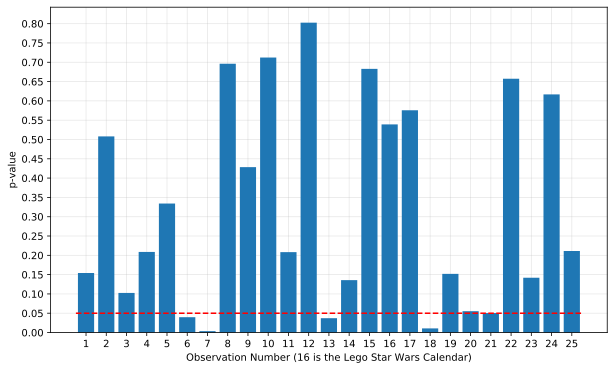

In [49]:
fig, ax = plt.subplots(figsize=(10, 6), facecolor='w')
ax.bar(range(1, len(observations) + 1), p_vals,
        width=0.8)
ax.set_xlabel('Observation Number (16 is the Lego Star Wars Calendar)')
ax.set_xticks(np.arange(1, len(observations) + 1))
ax.set_ylabel('p-value')
ax.set_yticks(np.arange(0, 0.85, 0.05))
ax.grid('k--', alpha=0.3)
ax.hlines(0.05, 0.5, len(observations) + 0.5, 'r', 'dashed')
ax.set_axisbelow(True)

Our Lego Star Wars calendar may not have had an extreme enough layout to achieve the standard $0.05$ significance threshold but there are several that do. We can therefore reject the null hypothesis, right? 

Not so fast. If we were to stop our analysis here, we would have fallen for a statistical fallacy known a [p-hacking](https://www.explainxkcd.com/wiki/index.php/882:_Significant). Yes, there may be some observations with p-values below 0.05 but it's worth remembering what that means. A p-value of 0.05 is equivalent to saying that, under the null hypothesis, we would have only expected to see such a result 5% of the time. That is, one in every twenty-or-so observations. But wait, we have 25 observations here so we shouldn't be at all surprised that at least one of them achieves statistical significance when we look at it by itself.

If we want to do things properly, we will have to use a [data fusion](https://en.wikipedia.org/wiki/Data_fusion) method. The most common of these is called Fisher's method, named after the legendary statistician Ronald Fisher. This involves looking at a second meta test statistic, $X^2$, given by

$$X^2 = -2\sum_{i=1}^k \ln p_i$$

where $p_i$ is the p-value of the $i$th observation and $k$ is the total number of observations. This statistic, in a sense, combines or fuses the 25 statistics we obtained from our analysis and corrects p-values so that we don't fall victim to p-hacking. Provided that the observations are independent (which they certainly are in our case), it is not hard to show (and we will in the next section) that this follows a chi-squared distribution with $2k$ degrees of freedom.

We can therefore calculate this meta statistic using the p-values obtained from our 25 regular statistics and compare it to a chi-squared distribution with 50 degrees of freedom. In our case, $X^2$ comes out to be $86.415$ which a distribution table or online calculator will show to be equivalent to the p-value of $0.00106$ that we saw in the first section.

<hr>

## Section Three - The Why

To wrap this post up, I will offer a complete proof of the validity of Fisher's method so that the die-hard mathematicians/statisticians can sleep easy.

Our starting point is noticing that under the null-hypothesis, p-values are uniformly distributed on the interval $(0,1)$. From my experience, there are two types of people; those who see this as an obvious statement, and those who are rather dubious of the claim. For some reason there is rarely any in-between. If you fall into the latter camp, I will provide a short explanation. 

This result follows directly from the definition of a p-value. Remember, a p-value less than $x \in (0, 1)$ under the null hypothesis occurs with probability $x$. In other words, if we treat $p$ as a random variable

$$F_p(x) = \mathbb{P}_0\left(p \leq x\right) = x, \quad x \in (0,1)$$

But that is exactly the definition of a uniform random variable on $(0, 1)$, just as we were after.

### Taking Logs

As a reminder, Fisher's method concerned the statistic

$$X^2 = -2\sum_{i=1}^k \ln p_i$$

claiming that it was distributed according to $\chi^2_{2k}$ under $H_0$.

Although this is a clearer form for computing the statistic, for the derivation of the method it is easier to write

$$X^2 = \sum_{i=1}^k 2\left( -\ln p_i\right)$$

It will become evident as to why this is by the end of this section.

From above, and noting that our observations are both independent and have identically distributed statistics we have that

$$p_i \stackrel{\textrm{iid}}\sim \textrm{Unif}(0, 1), \quad i \in [k]$$

What about $-\ln p_i$? It turns out that it has an standard (rate 1) exponential distribution. The proof of this statement is below.

$$
\begin{align}
\mathbb{P}(-\ln p_i \leq x)  & = \mathbb{P}(\ln p_i \geq -x)\\
& = \mathbb{P}(p_i \geq e^{-x}) \\
& = 1 - \mathbb{P}(p_i \leq e^{-x}) \\
& = 1 - \begin{cases}
0, & e^{-x} < 0\\
e^{-x}, & 0 \leq e^{-x} \leq 1\\
1, & e^{-x} > 1
\end{cases} \\
& = 1 - \begin{cases}
e^{-x}, & 0 \leq x\\
1, & x < 0
\end{cases}  \\
& = \begin{cases}
1 - e^{-x}, & 0 \leq x\\
0, & x < 0
\end{cases}
\end{align}
$$

In which the last expression is the cumulative density function of a standard exponential distribution. Note that to jump from line 3 to 4, we used the fact that the $p_i$'s are uniformly distributed on $(0, 1)$.

### Size Doesn't Matter

That's great and all, but we don't just have a $-\ln p_i$ in our expression for $X^2$ but rather two lots of this quantity. Thankfully, there is a useful result which states that the exponential distribution is closed under scaling by a positive constant. More specifically, if $X \sim \textrm{Exp}(\lambda)$ then $kX\sim \textrm{Exp}\left(\frac{\lambda}{k}\right)$. It follows that the distribution of $2\left(-\ln p_i\right)$ is exponential with rate parameter $\frac{1}{2}$.

The proof of this general result is short and sweet. If we let $Y = kX$ above then

$$F_Y(y) = \mathbb{P}(Y \leq y) = \mathbb{P}\left(X \leq \frac{y}{k}\right) = F_X\left(\frac{y}{k}\right)$$

By looking at the cumulative density function of an exponential random variable, it is then not hard to see that $Y$ is exponential with rate $\frac{\lambda}{k}$.

### A Distribution by Many Names

At this point we have that 

$$2\left(-\ln p_i\right) \stackrel{\textrm{iid}}\sim \textrm{Exp}\left(\frac{1}{2}\right), \quad i \in [k]$$

so where does this Chi-squared distribution come from? As a matter of fact, we have it already. Recall (or take my word for it), that the probability density function of a chi-squared random variable with $\nu$ degrees of freedom is given by

$$f_{\chi^2_\nu}(x) = \frac{1}{2 ^ {\frac{\nu}{2}}\Gamma\left(\frac{\nu}{2}\right)}x^{\frac{\nu}{2}-1}\exp^{-\frac{x}{2}}$$

In the special case where $\nu = 2$ (note that $\Gamma(1) = 0! = 1$ by convention) this becomes

$$f_{\chi^2_\nu}(x) = \frac{1}{2}e^{-\frac{x}{2}}$$

which is simply the density function of an exponential random variable with rate $\frac{1}{2}$. It all comes together!

### To Sum it Up

The equivalence above means that we can instead write

$$2\left(-\ln p_i\right) \stackrel{\textrm{iid}}\sim \chi^2_2, \quad i \in [k]$$

The finish line is in sight. All we have to do is sum up these $k$ independent chi-squared random variables and show that the resultant random variable follows a chi-squared distribution with $2k$ degrees of freedom.

This additivity property follows directly from the definition of the chi-squared distribution. This states that a random variable $X$ has a chi-squared distribution with $\nu$ degrees of freedom if and only if it can be written as

$$X = \sum_{i=1}^{\nu}Z_i^2$$

where the $Z_i$s are independent random variables, all following a standard normal distribution. That is $Z_i \stackrel{\textrm{iid}}\sim \textrm{N}(0, 1),  i \in [\nu]$.

We can therefore write

$$X_2 = \sum_{i=1}^k 2\left( -\ln p_i\right) = \sum_{i=1}^k \left(Z^2_{i, 1} + Z^2_{i, 2}\right)$$

where $Z_{i, j} \stackrel{\textrm{iid}}\sim \textrm{N}(0, 1), i \in [k], j \in \{1, 2\}$.

Since each $2\left(- \ln p_i\right)$ are independent, so must all of the $Z_{i, j}$. There are $2k$ of these in total and so $X^2 \sim \chi^2_{2k}$, completing this proof and in turn, this post.

I hope you found this supplementary dive into the theory to be beneficial.